In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data\\Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Line Plot

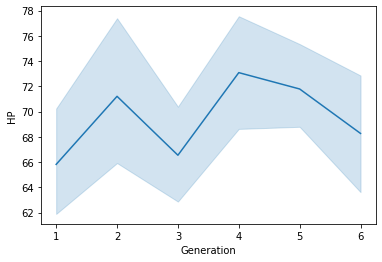

In [4]:
sns.lineplot(x='Generation', y='HP', data=df)
plt.show()

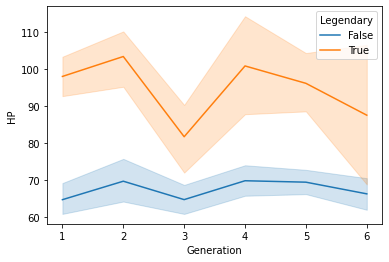

In [5]:
# hue : mapping the colors for different elements

sns.lineplot(x='Generation', y='HP', hue='Legendary', data=df)
plt.show()

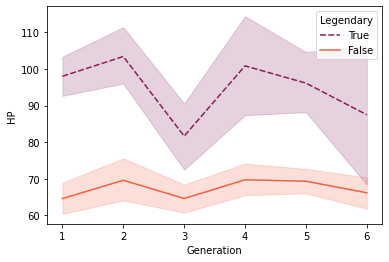

In [6]:
# Changing Hue order
# palatte : the colors of the plot ....
# style : mapping line style
sns.lineplot(x='Generation', y='HP', hue='Legendary', hue_order=[True, False], data=df, palette='rocket', style='Legendary')
plt.show()

## Bar Plot

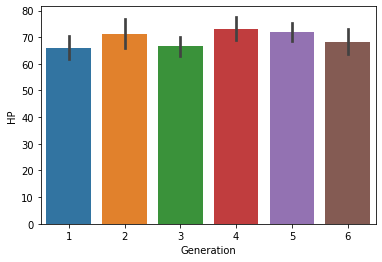

In [7]:
sns.barplot(x='Generation', y='HP', data=df)
plt.show()

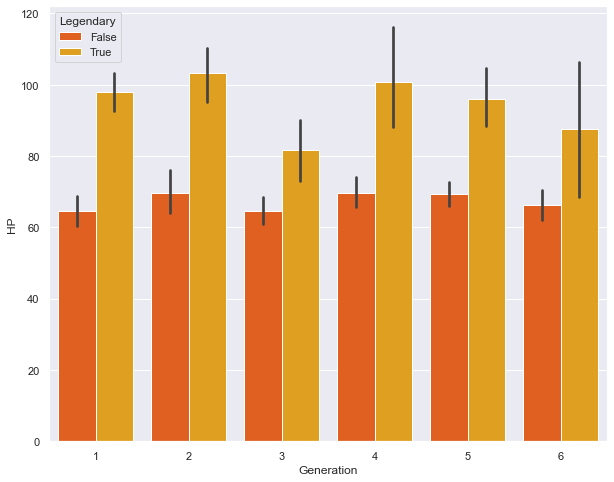

In [8]:
sns.set(rc={'figure.figsize': (10, 8)}) # Setting Figure size
sns.barplot(x='Generation', y='HP', hue='Legendary', data=df, palette='autumn')
plt.show()

## Scatter Plot

In [9]:
df2 = sns.load_dataset('Iris')
# Load an example dataset from the online repository (requires internet)

In [10]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


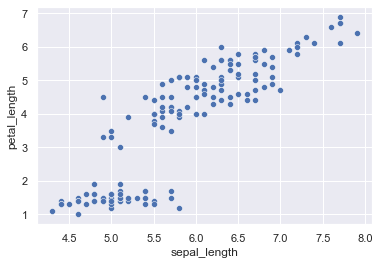

In [11]:
sns.set(rc={'figure.figsize': (6, 4)}) # Setting Figure size
sns.scatterplot(x='sepal_length', y='petal_length', data=df2)
plt.show()

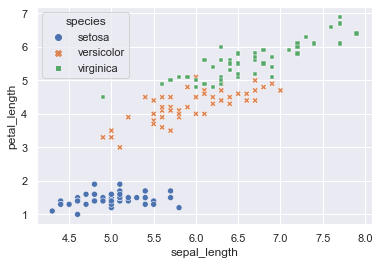

In [12]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', style='species', data=df2)
plt.show()

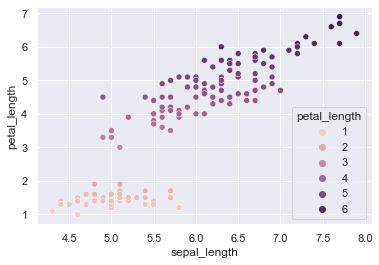

In [13]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='petal_length', data=df2)
plt.show()

## Displacement Plot

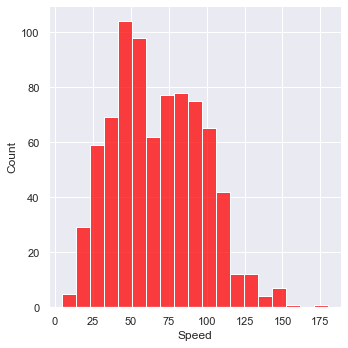

In [14]:
sns.displot(x='Speed', data=df, color='red')
plt.show()

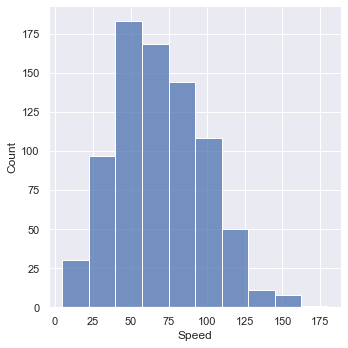

In [15]:
sns.displot(x='Speed', data=df, bins=10, kind='hist')
plt.show()

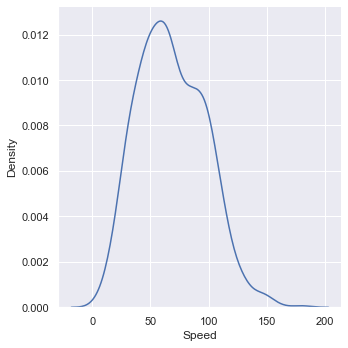

In [16]:
sns.displot(x='Speed', data=df, kind='kde')
plt.show()

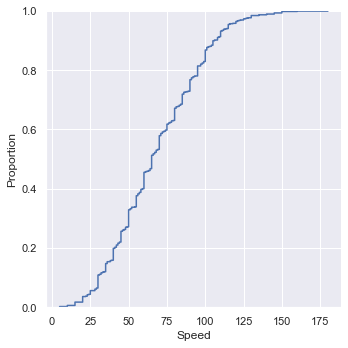

In [17]:
sns.displot(x='Speed', data=df, kind='ecdf')
plt.show()

## Joint Plot

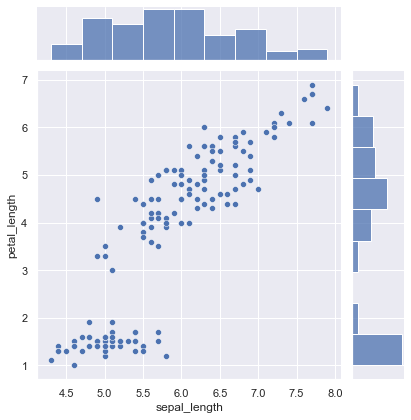

In [18]:
sns.jointplot(x='sepal_length', y='petal_length', data=df2)
plt.show()

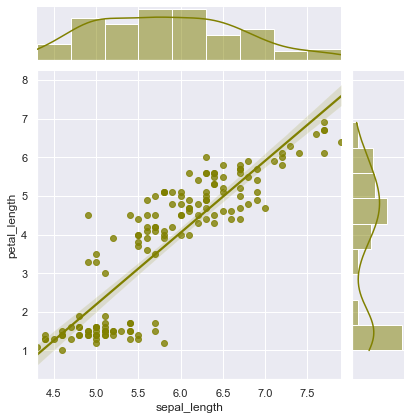

In [19]:
sns.jointplot(x='sepal_length', y='petal_length', data=df2, color='olive', kind='reg')
plt.show()

## Box PLot

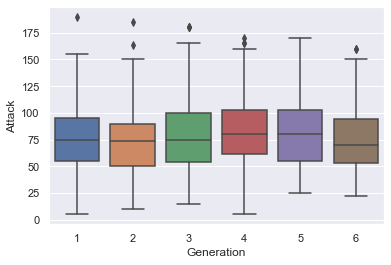

In [20]:
sns.boxplot(x='Generation', y='Attack', data=df)
plt.show()

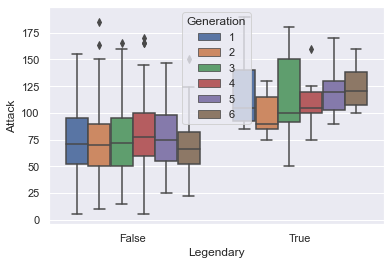

In [21]:
sns.boxplot(x='Legendary', y='Attack', hue='Generation', data=df)
plt.show()

## Display Multiple Plots

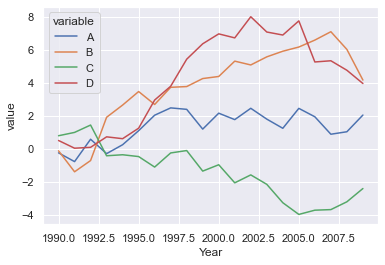

In [22]:
num_rows = 20
data_preproc = pd.DataFrame({
    'Year': list(range(1990, 1990 + num_rows)), 
    'A': np.random.randn(num_rows).cumsum(),
    'B': np.random.randn(num_rows).cumsum(),
    'C': np.random.randn(num_rows).cumsum(),
    'D': np.random.randn(num_rows).cumsum()})

sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data_preproc, ['Year']))
plt.show()

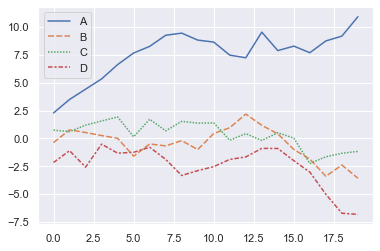

In [23]:
num_rows = 20

data_preproc = pd.DataFrame({
    'A': np.random.randn(num_rows).cumsum(),
    'B': np.random.randn(num_rows).cumsum(),
    'C': np.random.randn(num_rows).cumsum(),
    'D': np.random.randn(num_rows).cumsum()})

sns.lineplot(data=data_preproc)
plt.show()

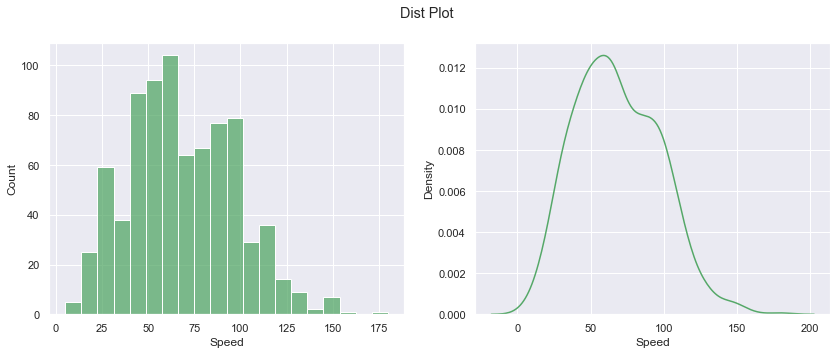

In [24]:
# Display Multiple plots in a figure
# Using subplot :
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

fig.suptitle('Dist Plot')

sns.histplot(x='Speed', ax=axes[0], bins=20, data=df, color='g', edgecolor=None)
sns.kdeplot(x='Speed', ax=axes[1], data=df, color='g')

plt.show()

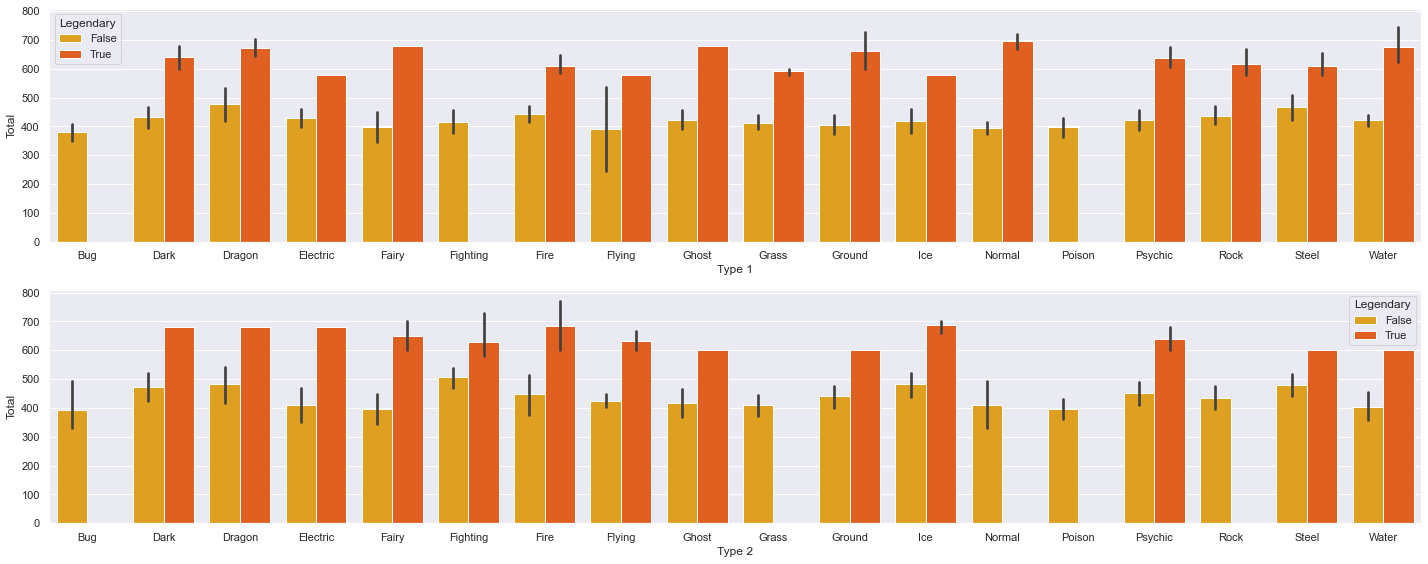

In [25]:
fg, axes = plt.subplots(2, 1, figsize=(20, 8), sharey=True)
sns.barplot(x='Type 1', y='Total', hue='Legendary', data=df.sort_values('Type 1'), ax=axes[0], palette='autumn_r')
sns.barplot(x='Type 2', y='Total', hue='Legendary', data=df.sort_values('Type 2'), ax=axes[1], palette='autumn_r')
plt.tight_layout()
plt.show()

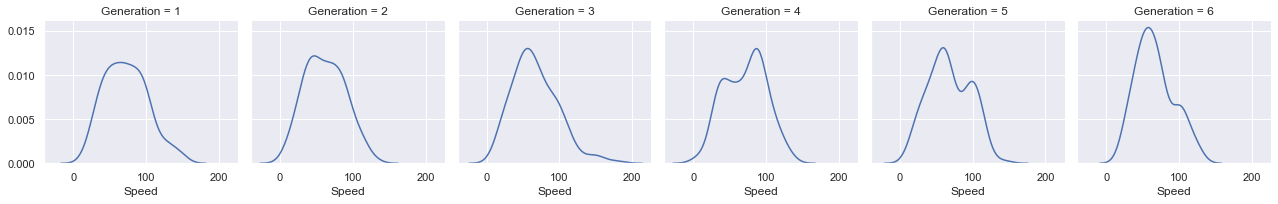

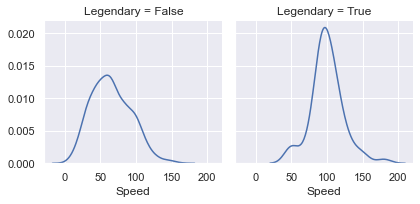

In [26]:
# Display Multiple plots in a figure
# Using FacetGrid :
g = sns.FacetGrid(df, col="Generation")
g.map(sns.kdeplot, "Speed")
plt.show()

g = sns.FacetGrid(df, col="Legendary")
g.map(sns.kdeplot, "Speed")
plt.show()

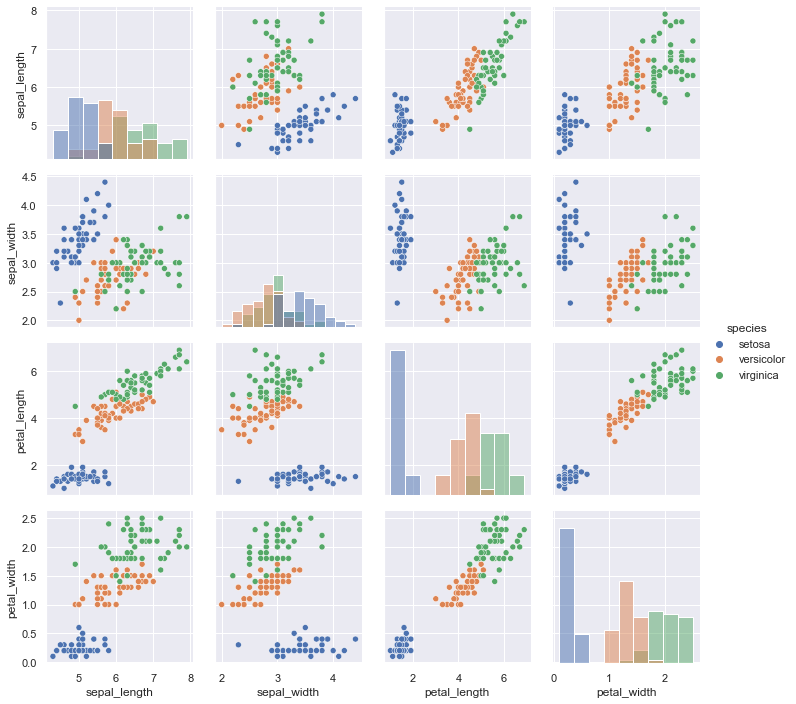

In [27]:
# Display Multiple plots in a figure
# Using PairGrid :

g = sns.PairGrid(df2, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()